<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [3]:
# Boston data is from SKlearn so it is clean

### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [4]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

predictors = ['CRIM', u'RM', 'B', 'LSTAT']

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=.5, test_size=.5, random_state=8)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.663557572218876

/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


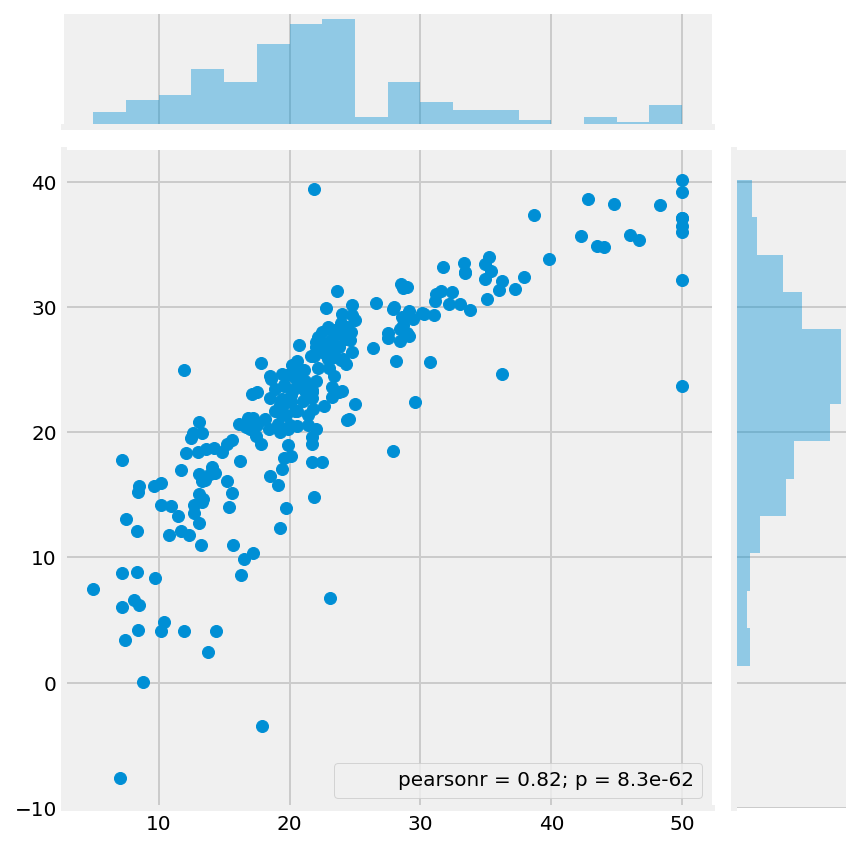

In [6]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat);

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.7, test_size=.3, random_state=8)


lr2 = LinearRegression()
lr2.fit(X_train,y_train)
lr2.score(X_test, y_test)

0.6161800060984299

/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


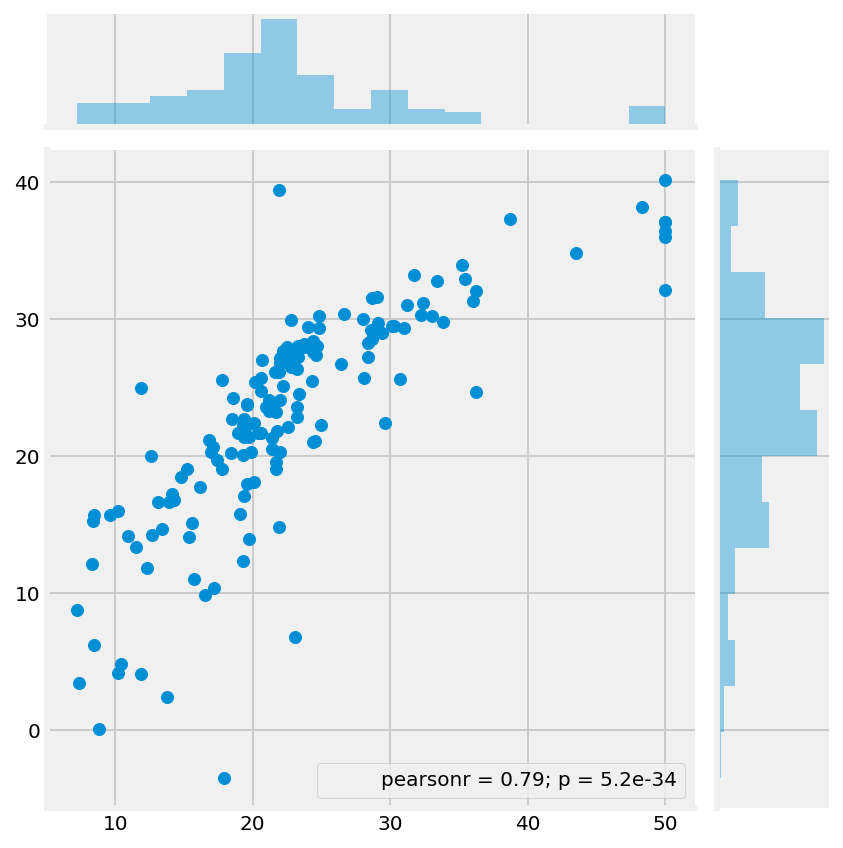

In [8]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat);

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.9, test_size=0.1, random_state=8)


lr2 = LinearRegression()
lr2.fit(X_train,y_train)
lr2.score(X_test, y_test)

0.5839244756380986

/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


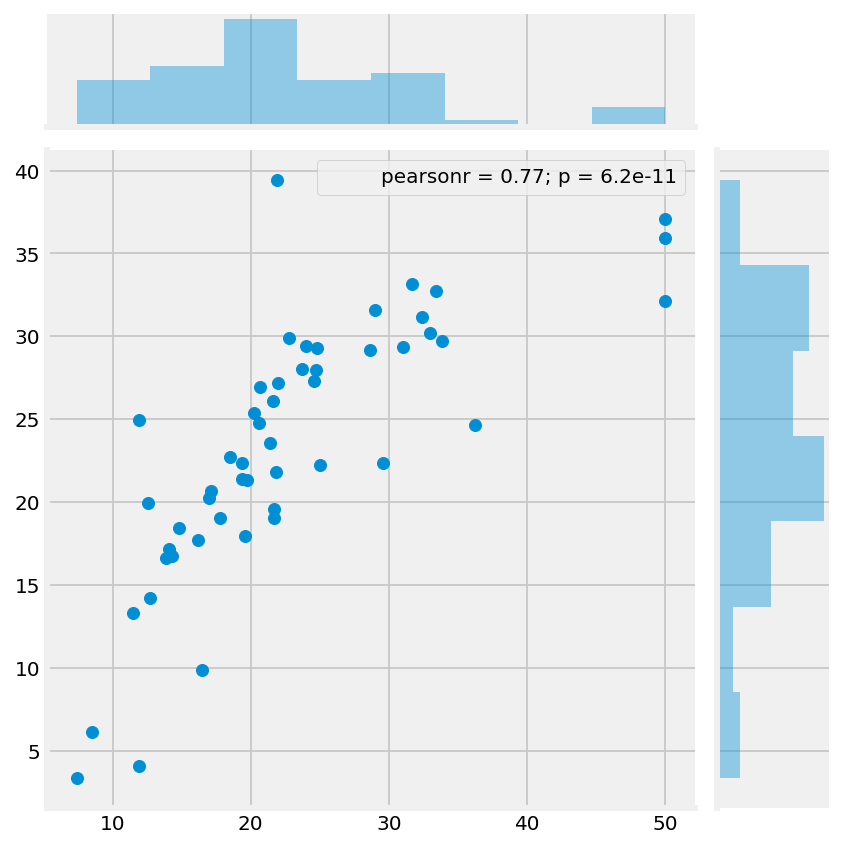

In [10]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat);

### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [11]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# iterate through folds 5-10
for folds in range(5,11):
    print('------------------------------------\n')
    print('K: {}'.format(folds))
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X[predictors], y, cv=folds)
    print("Cross-validated scores: {}".format(scores))
    print("Mean CV R2: {}".format(np.mean(scores)))
    print('Std CV R2: {}'.format(np.std(scores)))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X[predictors], y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2: {}".format(r2))


------------------------------------

K: 5
Cross-validated scores: [ 0.64631693  0.70482771  0.44121527  0.08620083 -0.50525881]
Mean CV R2: 0.2746603856925534
Std CV R2: 0.446027804377481
Cross-Predicted R2: 0.5173431725227935
------------------------------------

K: 6
Cross-validated scores: [ 0.60617609  0.70748062  0.52005295  0.6187581  -0.31575052 -0.22205816]
Mean CV R2: 0.3191098469909175
Std CV R2: 0.420181823715554
Cross-Predicted R2: 0.4798654514852594
------------------------------------

K: 7
Cross-validated scores: [ 0.6551403   0.59539945  0.53563504  0.49472098  0.24503727 -0.64989835
  0.11581191]
Mean CV R2: 0.2845495139064042
Std CV R2: 0.4216307788617244
Cross-Predicted R2: 0.4314684833588286
------------------------------------

K: 8
Cross-validated scores: [ 0.67247147  0.61771501  0.68493632  0.61008211  0.58758257 -0.28401756
 -1.07692607  0.03328161]
Mean CV R2: 0.23064068275695926
Std CV R2: 0.5954371664928758
Cross-Predicted R2: 0.5805843328702165
-----------

### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [12]:
from itertools import combinations

In [13]:
combs = []
for i in range(1, len(X.columns)+1):
    for c in combinations(X.columns.tolist(), i):
        combs.append(c)

In [14]:
linreg = LinearRegression()

R2_results = {}
for i,c in enumerate(combs):
    if (i % 250) == 0:
        print(i)
        
    subX = X[list(c)]
    R2_results[c] = np.mean(cross_val_score(linreg, subX, y))

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500
6750
7000
7250
7500
7750
8000


In [15]:
results = R2_results.items()
results = sorted(results, key=lambda x: x[1], reverse=True)

In [16]:
for i in range(5):
    print(results[i])

(('ZN', 'NOX', 'DIS', 'PTRATIO', 'LSTAT'), 0.5045148383236403)
(('ZN', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'), 0.5027669995795304)
(('NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.5015393804361515)
(('ZN', 'CHAS', 'NOX', 'DIS', 'PTRATIO', 'LSTAT'), 0.5010547381193208)
(('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'), 0.4986836730120596)


### 5.1 Can you explain what could be wrong with this approach?

Even though we are cross-validating to get our R2 score for each model we're testing, 
we're trying thousands of different models and then choosing the one that has the
absolute highest R2.
Cross-validation does not eliminate the fact that this is a random sample from an
overall population, and the highest R2 out of these models is likely going to be 
higher than the ones near it by chance. Is the model with the best R2 *REALLY* 
better than the 2nd highest? 3rd highest?

This is an important point: you are the researcher and you should, whenever possible,
NOT rely on the computer's "brute force". This is why EDA is so important as well
as domain knowledge. As a human being can we eliminate variables that we know 
should not be used to build the model?

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [17]:
import patsy

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

df = X.copy()

# Add response to core DataFrame
df['MEDV'] = y

In [18]:
# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("LSTAT ~ AGE + RM + MEDV", data=df, return_type="dataframe")

# "unravel" y
y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3)

In [19]:
from sklearn.linear_model import LinearRegression

# Build a new model and calculate the score:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.6904584351593857
